In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

2024-03-28 15:20:31.835727: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-28 15:20:31.835771: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-28 15:20:31.835800: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-28 15:20:31.842625: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import os
for dirname, _, filenames in os.walk(r'../dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../dataset/Tuesday-WorkingHours.pcap_ISCX.csv
../dataset/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
../dataset/Monday-WorkingHours.pcap_ISCX.csv
../dataset/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
../dataset/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
../dataset/Wednesday-workingHours.pcap_ISCX.csv
../dataset/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
../dataset/Friday-WorkingHours-Morning.pcap_ISCX.csv


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
nRowsRead = None 

df1=pd.read_csv(r"../dataset/Tuesday-WorkingHours.pcap_ISCX.csv")
df2=pd.read_csv(r"../dataset/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
df3=pd.read_csv(r"../dataset/Monday-WorkingHours.pcap_ISCX.csv")
df4=pd.read_csv(r"../dataset/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
df5=pd.read_csv(r"../dataset/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
df6=pd.read_csv(r"../dataset/Wednesday-workingHours.pcap_ISCX.csv")
df7=pd.read_csv(r"../dataset/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
df8=pd.read_csv(r"../dataset/Friday-WorkingHours-Morning.pcap_ISCX.csv")

In [3]:
df = pd.concat([df1,df2])
del df1,df2
df = pd.concat([df,df3])
del df3
df = pd.concat([df,df4])
del df4
df = pd.concat([df,df5])
del df5
df = pd.concat([df,df6])
del df6
df = pd.concat([df,df7])
del df7
df = pd.concat([df,df8])
del df8

nRow, nCol = df.shape

In [4]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,88,640,7,4,440,358,220,0,62.857143,107.349008,179,0,89.5,103.345698,1246875.000,17187.500000,64.000000,135.557286,445,1,640,106.666667,194.325157,497,1,538,179.333333,303.686242,530,4,0,0,0,0,164,104,10937.500000,6250.000000,0,220,66.500000,99.001837,9801.363636,0,0,0,1,0,0,0,0,0,72.545455,62.857143,89.5,164,0,0,0,0,0,0,7,440,4,358,8192,2053,2,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,88,900,9,4,600,2944,300,0,66.666667,132.287566,1472,0,736.0,849.859596,3937777.778,14444.444440,75.000000,192.795228,684,1,900,112.500000,252.411229,734,1,766,255.333333,435.323252,758,3,0,0,0,0,204,104,10000.000000,4444.444444,0,1472,253.142857,527.434262,278186.901100,0,0,0,1,0,0,0,0,0,272.615385,66.666667,736.0,204,0,0,0,0,0,0,9,600,4,2944,8192,2053,2,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1205,7,4,2776,2830,1388,0,396.571429,677.274651,1415,0,707.5,816.950631,4652282.158,9128.630705,120.500000,236.433336,777,1,1205,200.833333,397.058392,1008,1,927,309.000000,491.647231,876,1,0,0,0,0,164,104,5809.128631,3319.502075,0,1415,467.166667,690.098917,476236.515200,0,0,0,1,0,0,0,0,0,509.636364,396.571429,707.5,164,0,0,0,0,0,0,7,2776,4,2830,8192,2053,2,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,88,511,7,4,452,370,226,0,64.571429,110.276708,185,0,92.5,106.809800,1608610.568,21526.418790,51.100000,90.767652,299,1,511,85.166667,131.900594,349,1,462,154.000000,224.719826,412,1,0,0,0,0,164,104,13698.630140,7827.788650,0,226,68.500000,101.933579,10390.454550,0,0,0,1,0,0,0,0,0,74.727273,64.571429,92.5,164,0,0,0,0,0,0,7,452,4,370,8192,2053,2,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,773,9,4,612,2944,306,0,68.000000,134.933317,1472,0,736.0,849.859596,4600258.732,16817.593790,64.416667,148.698266,531,1,773,96.625000,196.665733,580,1,675,225.000000,348.901132,627,1,0,0,0,0,204,104,11642.949550,5174.644243,0,1472,254.000000,527.520762,278278.153800,0,0,0,1,0,0,0,0,0,273.538461,68.000000,736.0,204,0,0,0,0,0,0,9,612,4,2944,8192,2053,2,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2830743 entries, 0 to 191032
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max               

In [6]:
df.isnull().sum()

 Destination Port                  0
 Flow Duration                     0
 Total Fwd Packets                 0
 Total Backward Packets            0
Total Length of Fwd Packets        0
 Total Length of Bwd Packets       0
 Fwd Packet Length Max             0
 Fwd Packet Length Min             0
 Fwd Packet Length Mean            0
 Fwd Packet Length Std             0
Bwd Packet Length Max              0
 Bwd Packet Length Min             0
 Bwd Packet Length Mean            0
 Bwd Packet Length Std             0
Flow Bytes/s                    1358
 Flow Packets/s                    0
 Flow IAT Mean                     0
 Flow IAT Std                      0
 Flow IAT Max                      0
 Flow IAT Min                      0
Fwd IAT Total                      0
 Fwd IAT Mean                      0
 Fwd IAT Std                       0
 Fwd IAT Max                       0
 Fwd IAT Min                       0
Bwd IAT Total                      0
 Bwd IAT Mean                      0
 

In [7]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)  

In [8]:
print(df.duplicated().sum(), "fully duplicate rows to remove")

307078 fully duplicate rows to remove


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
print(df.duplicated().sum(), "fully duplicate rows to remove")

0 fully duplicate rows to remove


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2520798 entries, 0 to 191032
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max               

In [12]:
df_encoded = df.copy()

le = LabelEncoder()

df_encoded[' Label'] = le.fit_transform(df[' Label'])

X = df_encoded.drop(' Label', axis=1)
y = df_encoded[' Label']

In [13]:
X = df.drop(' Label', axis=1)
y = df[' Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
print(y_train.value_counts())

 Label
BENIGN                        1676045
DoS Hulk                       138277
DDoS                           102411
PortScan                        72555
DoS GoldenEye                    8229
FTP-Patator                      4745
DoS slowloris                    4308
DoS Slowhttptest                 4182
SSH-Patator                      2575
Bot                              1558
Web Attack � Brute Force         1176
Web Attack � XSS                  522
Infiltration                       29
Web Attack � Sql Injection         17
Heartbleed                          9
Name: count, dtype: int64


In [15]:
sampling_strategy_over = {
    "DoS Hulk": 200000, 
    "DDoS": 150000, 
    "PortScan": 100000, 
    "DoS GoldenEye": 10000, 
    "FTP-Patator": 7000, 
    "DoS slowloris": 7000, 
    "DoS Slowhttptest": 7000, 
    "SSH-Patator": 5000, 
    "Bot": 3000, 
    "Web Attack � Brute Force": 2000, 
    "Web Attack � XSS": 1500, 
    "Infiltration": 1500, 
    "Web Attack � Sql Injection": 1500, 
    "Heartbleed": 1500
}

# undersampling the majority class
sampling_strategy_under = {
    "BENIGN": 500000  
}

In [16]:
over = SMOTE(sampling_strategy=sampling_strategy_over)
under = RandomUnderSampler(sampling_strategy=sampling_strategy_under)


X_train_res, y_train_res = over.fit_resample(X_train, y_train)
X_train_res, y_train_res= under.fit_resample(X_train_res, y_train_res)

print(y_train_res.value_counts())


 Label
BENIGN                        500000
DoS Hulk                      200000
DDoS                          150000
PortScan                      100000
DoS GoldenEye                  10000
DoS Slowhttptest                7000
DoS slowloris                   7000
FTP-Patator                     7000
SSH-Patator                     5000
Bot                             3000
Web Attack � Brute Force        2000
Heartbleed                      1500
Infiltration                    1500
Web Attack � Sql Injection      1500
Web Attack � XSS                1500
Name: count, dtype: int64


In [20]:
X_train_res = None 
y_train_res=None

In [21]:
X_train_res,y_train_res=X_train, y_train

In [17]:
# Normalize the features
scaler = MinMaxScaler()

# Fit on resampled training data and transform both train and test data
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# Initialize the LabelEncoder
label_encoder = LabelEncoder()
# Fit on resampled training labels and transform both train and test labels
y_train_res_encoded = label_encoder.fit_transform(y_train_res)
y_test_encoded = label_encoder.transform(y_test)
# Convert label encoded labels to one-hot encoded format
y_train_res_one_hot = to_categorical(y_train_res_encoded)
y_test_one_hot = to_categorical(y_test_encoded)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    419012
           1       0.83      0.84      0.83       390
           2       1.00      1.00      1.00     25603
           3       0.99      0.99      0.99      2057
           4       1.00      1.00      1.00     34569
           5       0.99      0.99      0.99      1046
           6       0.99      0.99      0.99      1077
           7       1.00      1.00      1.00      1186
           8       0.67      1.00      0.80         2
           9       0.75      0.86      0.80         7
          10       0.99      0.98      0.99     18139
          11       1.00      1.00      1.00       644
          12       0.75      0.76      0.75       294
          13       0.67      0.50      0.57         4
          14       0.43      0.42      0.42       130

    accuracy                           1.00    504160
   macro avg       0.87      0.89      0.88    504160
wei

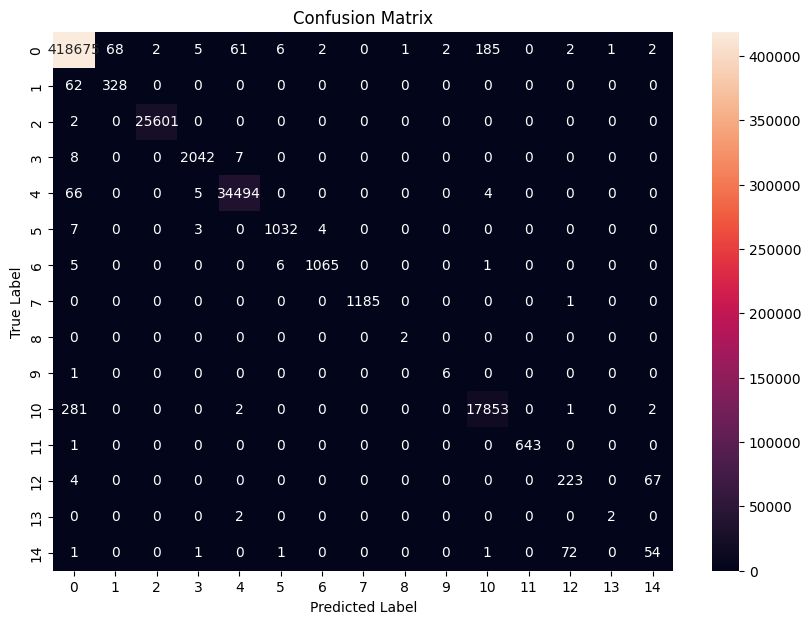

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

dt_classifier = DecisionTreeClassifier(random_state=42)

dt_classifier.fit(X_train_res_scaled, y_train_res_encoded)

y_pred = dt_classifier.predict(X_test_scaled)

# Generate the classification report
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred))

# Generate the confusion matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
print(conf_matrix)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [20]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy: {accuracy:.4f}")

precision, recall, f1, _ = precision_recall_fscore_support(y_test_encoded, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.9981
Precision: 0.9983
Recall: 0.9981
F1 Score: 0.9982


In [24]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Calculate the accuracy
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision, recall, F1 score, and support
precision, recall, f1, _ = precision_recall_fscore_support(y_test_encoded, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.9981
Precision: 0.9981
Recall: 0.9981
F1 Score: 0.9981


In [25]:
# Grid Search


In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the model
dt = DecisionTreeClassifier(random_state=42)

# Define the grid of hyperparameters to search
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ["gini", "entropy"]
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_res_scaled, y_train_res_encoded)

# Print the best parameters and the best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")


Best parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best score: 0.9986740307328766


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    419012
           1       0.67      0.95      0.79       390
           2       1.00      1.00      1.00     25603
           3       0.99      0.99      0.99      2057
           4       1.00      1.00      1.00     34569
           5       0.98      1.00      0.99      1046
           6       0.99      0.99      0.99      1077
           7       1.00      1.00      1.00      1186
           8       1.00      0.50      0.67         2
           9       0.54      1.00      0.70         7
          10       0.99      1.00      0.99     18139
          11       1.00      1.00      1.00       644
          12       0.78      0.65      0.71       294
          13       0.30      0.75      0.43         4
          14       0.42      0.57      0.48       130

    accuracy                           1.00    504160
   macro avg       0.84      0.89      0.85    504160
wei

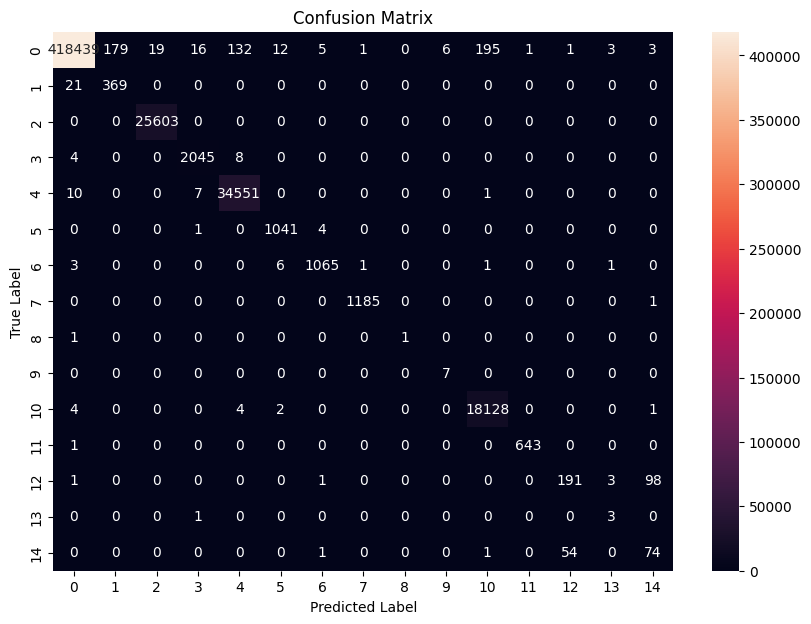

Overall Accuracy: 0.9984
Overall Precision: 0.9985
Overall Recall: 0.9984
Overall F1 Score: 0.9984


In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns

# Train the classifier using the best parameters
dt_optimized = DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=4, min_samples_split=10, random_state=42)
dt_optimized.fit(X_train_res_scaled, y_train_res_encoded)

# Generate predictions on the test set
y_pred_optimized = dt_optimized.predict(X_test_scaled)

# Calculate and print the classification report
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred_optimized))

# Calculate and print the confusion matrix
conf_matrix_optimized = confusion_matrix(y_test_encoded, y_pred_optimized)
print("Confusion Matrix:")
print(conf_matrix_optimized)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix_optimized, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

accuracy = accuracy_score(y_test_encoded, y_pred_optimized)
precision, recall, f1, _ = precision_recall_fscore_support(y_test_encoded, y_pred_optimized, average='weighted')

print(f"Overall Accuracy: {accuracy:.4f}")
print(f"Overall Precision: {precision:.4f}")
print(f"Overall Recall: {recall:.4f}")
print(f"Overall F1 Score: {f1:.4f}")


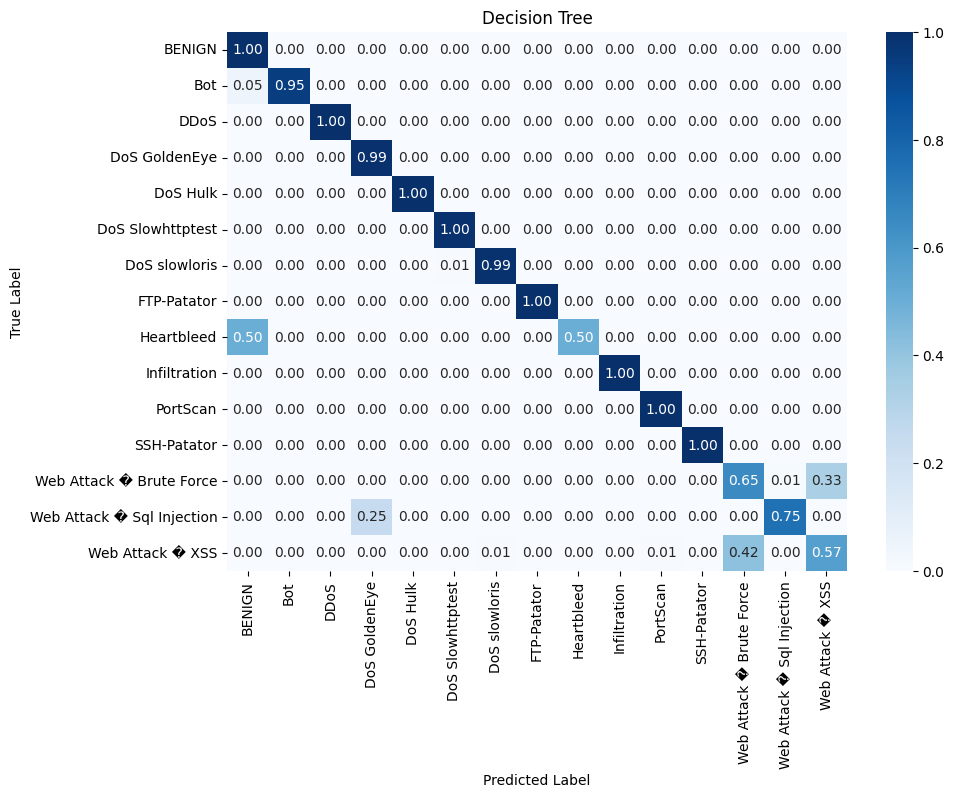

In [27]:
# Normalize the confusion matrix by rows
row_sums = conf_matrix_optimized.sum(axis=1)
conf_matrix_normalized = conf_matrix_optimized / row_sums[:, np.newaxis]

# Plot the normalized confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix_normalized, annot=True, fmt=".2f", cmap='Blues',xticklabels=le.classes_, yticklabels=le.classes_)  # Use fmt=".2f" to format the numbers
plt.title("Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [28]:
from sklearn.metrics import precision_recall_fscore_support





# Compute weighted average precision, recall, f1-score
precision_weighted, recall_weighted, f1_score_weighted, _ = precision_recall_fscore_support(y_test_encoded, y_pred_optimized, average='weighted')
print(f"Weighted Average Precision: {precision_weighted:.4f}")
print(f"Weighted Average Recall: {recall_weighted:.4f}")
print(f"Weighted Average F1-Score: {f1_score_weighted:.4f}")

# Compute micro average precision, recall, f1-score
precision_micro, recall_micro, f1_score_micro, _ = precision_recall_fscore_support(y_test_encoded, y_pred_optimized, average='macro')
print(f"Micro Average Precision: {precision_micro:.4f}")
print(f"Micro Average Recall: {recall_micro:.4f}")
print(f"Micro Average F1-Score: {f1_score_micro:.4f}")

# Print overall accuracy
print(f"Overall Accuracy: {accuracy:.4f}")


Weighted Average Precision: 0.9985
Weighted Average Recall: 0.9984
Weighted Average F1-Score: 0.9984
Micro Average Precision: 0.8431
Micro Average Recall: 0.8926
Micro Average F1-Score: 0.8485
Overall Accuracy: 0.9984


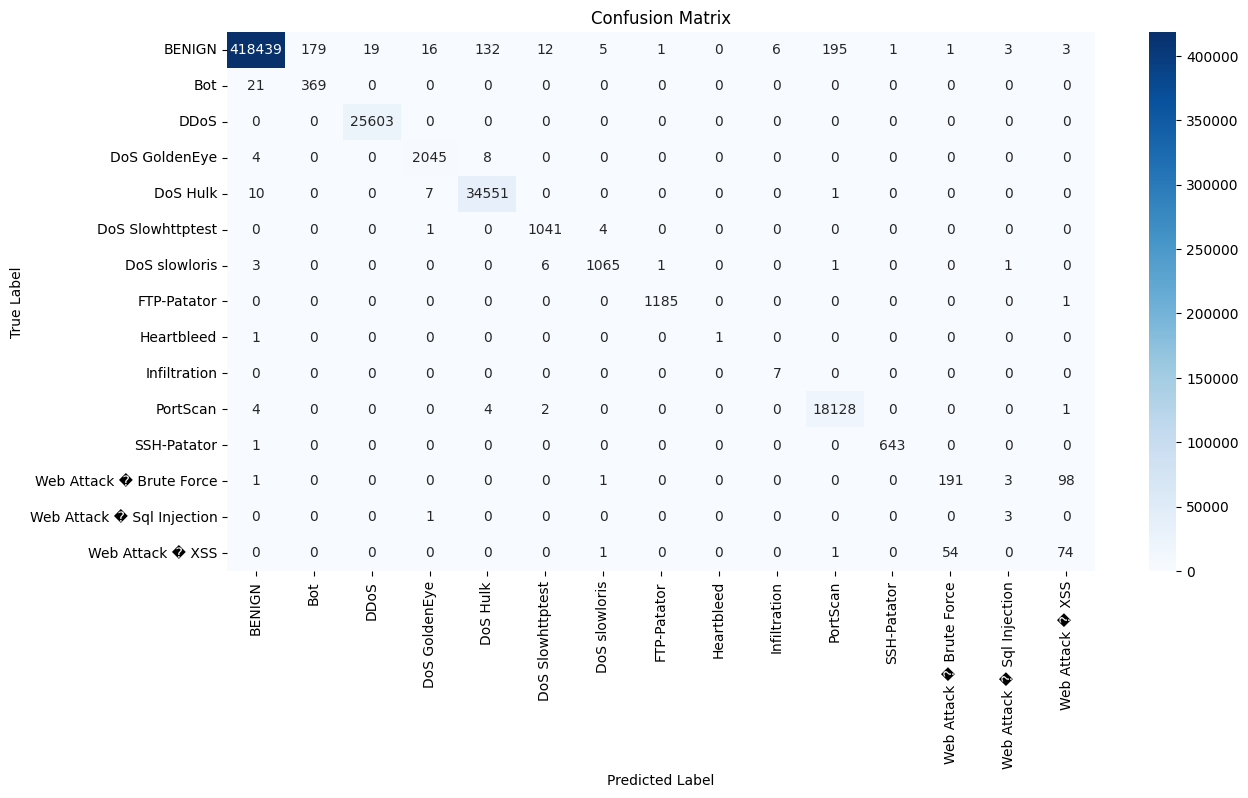

In [30]:
# Plot the confusion matrix
plt.figure(figsize=(14,7))
sns.heatmap(conf_matrix_optimized, annot=True, fmt="d",cmap='Blues',xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
